<a href="https://colab.research.google.com/github/muhammad-28/ICT-internship-ML-AI/blob/day-3/assignment_3_HOUSING_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/HousingData.csv')

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
num_cols=data[['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']]

In [ ]:
num_cols.isna().sum()

CRIM     20
ZN       20
INDUS    20
CHAS     20
AGE      20
LSTAT    20
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)

In [ ]:
num_cols=pd.DataFrame(num_cols,columns=[['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']])

In [ ]:
num_cols.isna().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
AGE      0
LSTAT    0
dtype: int64

In [ ]:
data.drop(['CRIM','ZN','INDUS','CHAS','AGE','LSTAT'],axis=1,inplace=True)

In [ ]:
data=pd.concat([num_cols,data],axis=1)

In [ ]:
data.head()

,"(CRIM,)","(ZN,)","(INDUS,)","(CHAS,)","(AGE,)","(LSTAT,)",NOX,RM,DIS,RAD,TAX,PTRATIO,B,MEDV
0,0.00632,18.0,2.31,0.0,65.2,4.980000,0.538,6.575,4.0900,1,296,15.3,396.90,24.0
1,0.02731,0.0,7.07,0.0,78.9,9.140000,0.469,6.421,4.9671,2,242,17.8,396.90,21.6
2,0.02729,0.0,7.07,0.0,61.1,4.030000,0.469,7.185,4.9671,2,242,17.8,392.83,34.7
3,0.03237,0.0,2.18,0.0,45.8,2.940000,0.458,6.998,6.0622,3,222,18.7,394.63,33.4
4,0.06905,0.0,2.18,0.0,54.2,12.715432,0.458,7.147,6.0622,3,222,18.7,396.90,36.2


In [ ]:
data.isna().sum()

(CRIM,)     0
(ZN,)       0
(INDUS,)    0
(CHAS,)     0
(AGE,)      0
(LSTAT,)    0
NOX         0
RM          0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
MEDV        0
dtype: int64

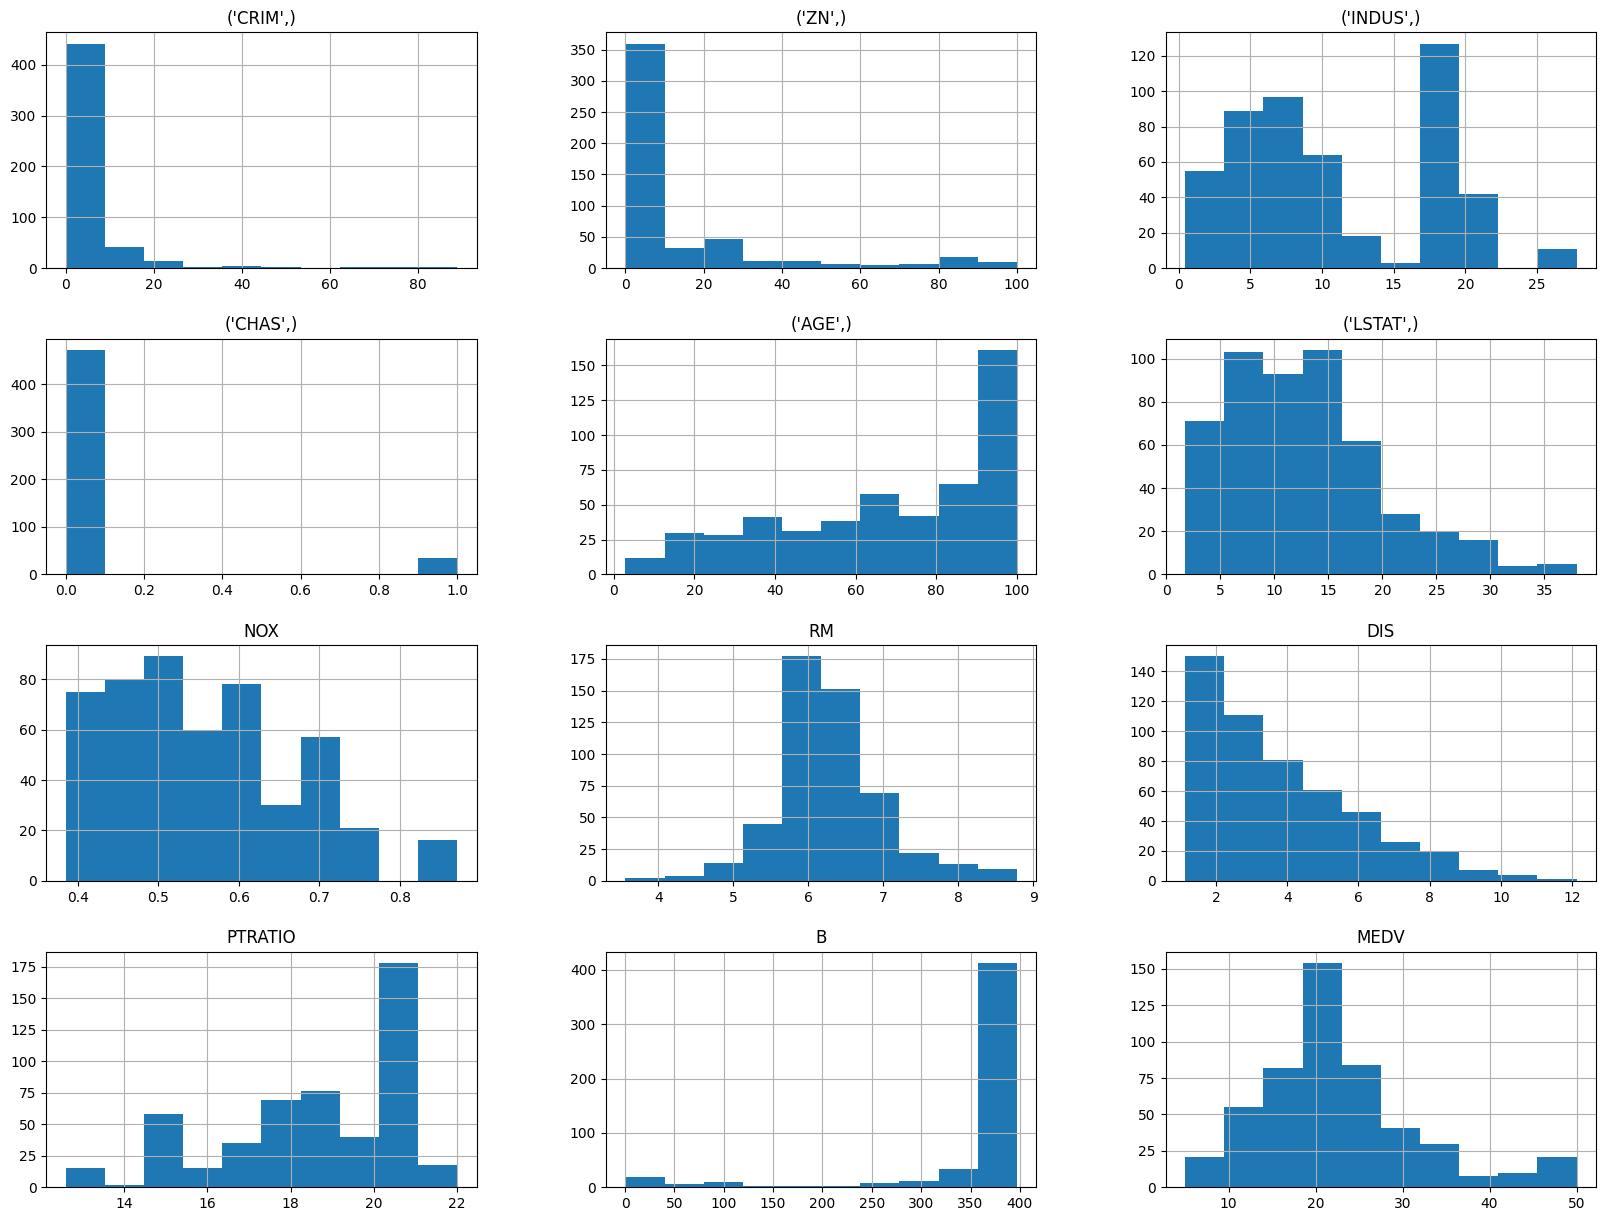

In [ ]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data=pd.read_csv('/content/HousingData.csv')

In [ ]:
data['CRIM']=data['CRIM'].fillna(data['CRIM'].median())

In [ ]:
data.CRIM.isna().sum()

0

In [ ]:
for i in ['ZN','INDUS','CHAS','AGE','LSTAT']:
   data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
data.groupby('CRIM').mean()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,,,,,,,,,,,,,
0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85,32.2
0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23,22.0
0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49,32.7
0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


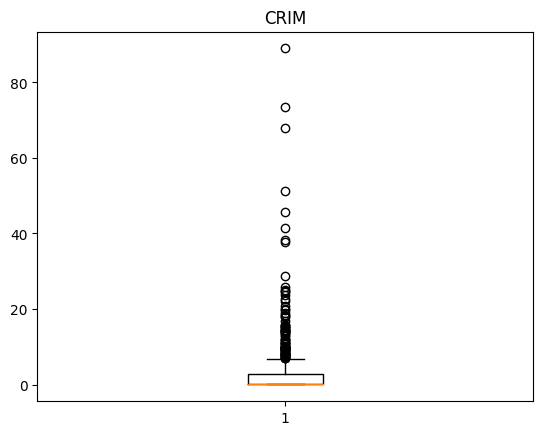

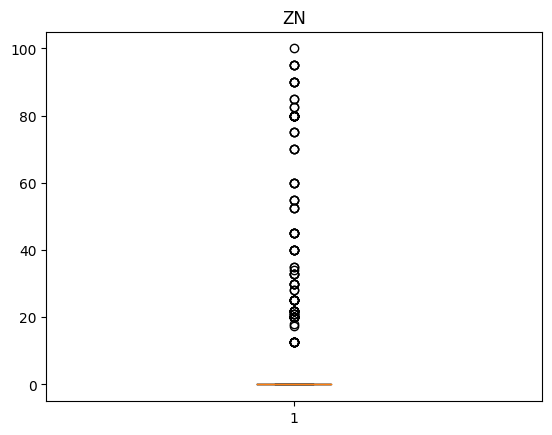

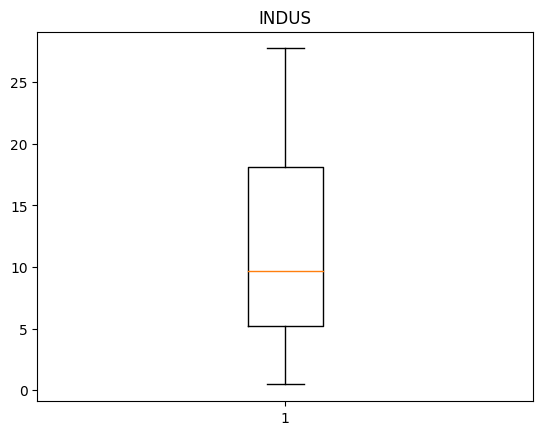

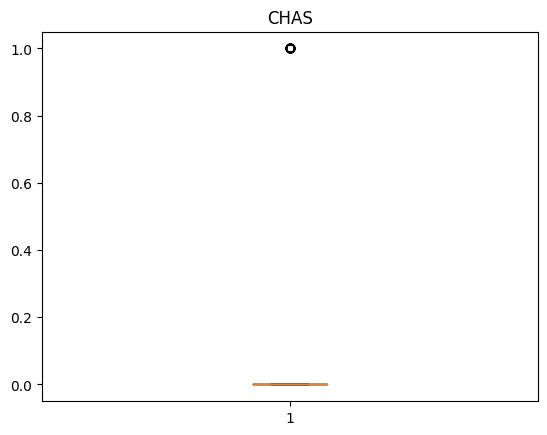

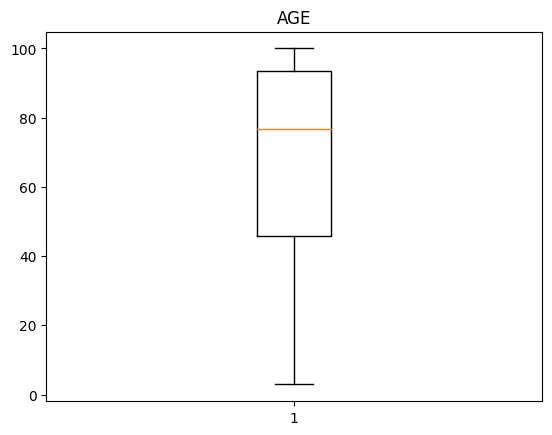

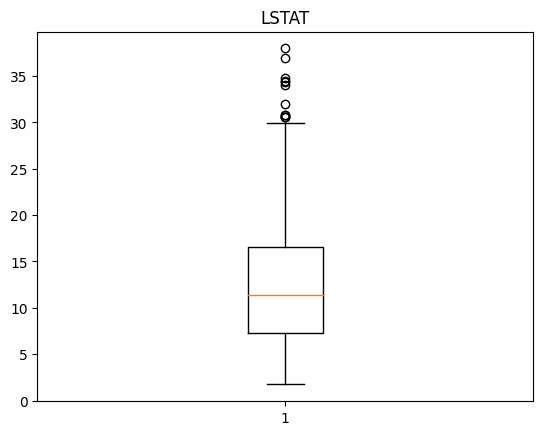

In [ ]:
for i in ['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [ ]:
Q1=np.percentile(data['CRIM'],25,interpolation='midpoint')
Q2=np.percentile(data['CRIM'],50,interpolation='midpoint')
Q3=np.percentile(data['CRIM'],75,interpolation='midpoint')

<ipython-input-197-afcfb12a406f>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['CRIM'],25,interpolation='midpoint')
<ipython-input-197-afcfb12a406f>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['CRIM'],50,interpolation='midpoint')
<ipython-input-197-afcfb12a406f>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data

In [ ]:
print(Q1)
print(Q2)
print(Q3)

0.08338999999999999
0.253715
2.79906


In [ ]:
data['CRIM'].median()

0.253715

In [ ]:
IQR=Q3-Q1

In [ ]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [ ]:
low_lim

-3.990115

In [ ]:
up_lim

6.872565

In [ ]:
outlier=[]
for x in data['CRIM']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [ ]:
outlier

[8.98296,
 13.5222,
 9.2323,
 8.26725,
 11.1081,
 18.4982,
 19.6091,
 15.288,
 9.82349,
 23.6482,
 17.8667,
 88.9762,
 15.8744,
 9.18702,
 7.99248,
 20.0849,
 16.8118,
 24.3938,
 22.5971,
 14.3337,
 8.15174,
 6.96215,
 11.5779,
 8.71675,
 7.67202,
 38.3518,
 9.91655,
 25.0461,
 14.2362,
 9.59571,
 24.8017,
 41.5292,
 67.9208,
 20.7162,
 11.9511,
 7.40389,
 51.1358,
 14.0507,
 18.811,
 28.6558,
 45.7461,
 18.0846,
 10.8342,
 25.9406,
 73.5341,
 11.8123,
 11.0874,
 7.02259,
 12.0482,
 7.05042,
 8.79212,
 15.8603,
 37.6619,
 7.36711,
 9.33889,
 10.0623,
 13.9134,
 11.1604,
 14.4208,
 15.1772,
 13.6781,
 9.39063,
 22.0511,
 9.72418,
 9.96654,
 12.8023,
 10.6718,
 9.92485,
 9.32909,
 7.52601,
 8.24809,
 9.51363,
 8.20058,
 7.75223,
 7.83932,
 15.5757,
 13.0751,
 8.05579,
 15.0234,
 10.233,
 14.3337]

In [ ]:
ind1=data['CRIM']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [ ]:
ind2=data['CRIM']>up_lim
data.loc[ind2].index

Int64Index([356, 367, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381,
            382, 383, 384, 385, 386, 387, 388, 389, 390, 392, 395, 397, 398,
            399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 410, 411, 412,
            413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
            427, 428, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443,
            444, 445, 447, 448, 449, 453, 454, 457, 458, 464, 468, 469, 474,
            477, 478, 479],
           dtype='int64')

In [ ]:
data.drop([356, 367, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381,
            382, 383, 384, 385, 386, 387, 388, 389, 390, 392, 395, 397, 398,
            399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 410, 411, 412,
            413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
            427, 428, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443,
            444, 445, 447, 448, 449, 453, 454, 457, 458, 464, 468, 469, 474,
            477, 478, 479],inplace=True)

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


Text(0.5, 1.0, 'Box plot of CRIM')

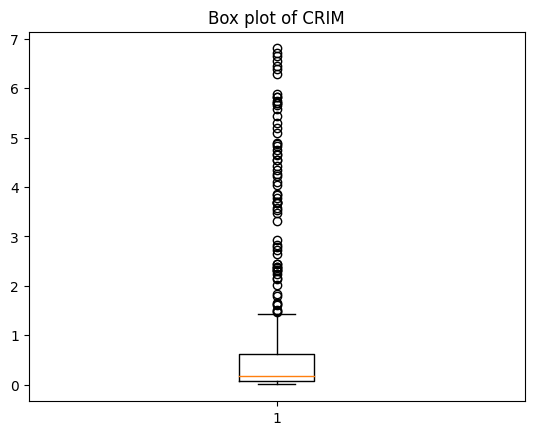

In [ ]:
plt.boxplot(data['CRIM'])
plt.title("Box plot of CRIM")

In [ ]:
Q1=np.percentile(data['ZN'],25,interpolation='midpoint')
Q2=np.percentile(data['ZN'],50,interpolation='midpoint')
Q3=np.percentile(data['ZN'],75,interpolation='midpoint')

<ipython-input-212-8b29d06b7b28>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['ZN'],25,interpolation='midpoint')
<ipython-input-212-8b29d06b7b28>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['ZN'],50,interpolation='midpoint')
<ipython-input-212-8b29d06b7b28>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data['ZN

In [ ]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
20.0


In [ ]:
data['ZN'].median()

0.0

In [ ]:
IQR=Q3-Q1

In [ ]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [ ]:
low_lim

-30.0

In [ ]:
up_lim

50.0

In [ ]:
outlier=[]
for x in data['ZN']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [ ]:
outlier

[75.0,
 75.0,
 75.0,
 90.0,
 85.0,
 100.0,
 80.0,
 80.0,
 60.0,
 60.0,
 80.0,
 80.0,
 80.0,
 80.0,
 95.0,
 95.0,
 82.5,
 82.5,
 95.0,
 95.0,
 80.0,
 80.0,
 90.0,
 90.0,
 90.0,
 55.0,
 80.0,
 52.5,
 52.5,
 52.5,
 80.0,
 80.0,
 80.0,
 70.0,
 70.0,
 70.0,
 55.0,
 55.0,
 85.0,
 80.0,
 60.0,
 60.0,
 90.0,
 80.0]

In [ ]:
ind1=data['ZN']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [ ]:
ind2=data['ZN']>up_lim
data.loc[ind2].index

Int64Index([ 39,  40,  54,  55,  56,  57,  65,  66, 193, 194, 195, 196, 197,
            198, 199, 200, 201, 202, 203, 204, 254, 255, 256, 283, 284, 285,
            286, 287, 288, 289, 290, 291, 292, 298, 299, 300, 343, 344, 347,
            348, 351, 352, 353, 354],
           dtype='int64')

In [ ]:
data.drop([39,  40,  54,  55,  56,  57,  65,  66, 193, 194, 195, 196, 197,
            198, 199, 200, 201, 202, 203, 204, 254, 255, 256, 283, 284, 285,
            286, 287, 288, 289, 290, 291, 292, 298, 299, 300, 343, 344, 347,
            348, 351, 352, 353, 354],inplace=True)

Text(0.5, 1.0, 'Box plot of ZN')

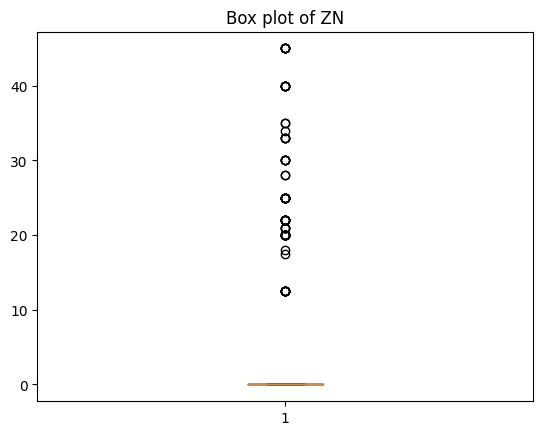

In [ ]:
plt.boxplot(data['ZN'])
plt.title("Box plot of ZN")

In [ ]:
Q1=np.percentile(data['INDUS'],25,interpolation='midpoint')
Q2=np.percentile(data['INDUS'],50,interpolation='midpoint')
Q3=np.percentile(data['INDUS'],75,interpolation='midpoint')

<ipython-input-226-4ec10d5fa65a>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['INDUS'],25,interpolation='midpoint')
<ipython-input-226-4ec10d5fa65a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['INDUS'],50,interpolation='midpoint')
<ipython-input-226-4ec10d5fa65a>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(da

In [ ]:
print(Q1)
print(Q2)
print(Q3)

5.86
8.56
18.1


In [ ]:
data['INDUS'].median()

8.56

In [ ]:
IQR=Q3-Q1

In [ ]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [ ]:
low_lim

-12.500000000000004

In [ ]:
up_lim

36.46000000000001

In [ ]:
outlier=[]
for x in data['INDUS']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [ ]:
outlier

[]

In [ ]:
ind1=data['INDUS']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [ ]:
ind2=data['INDUS']>up_lim
data.loc[ind2].index

Int64Index([], dtype='int64')

Text(0.5, 1.0, 'Box plot of INDUS')

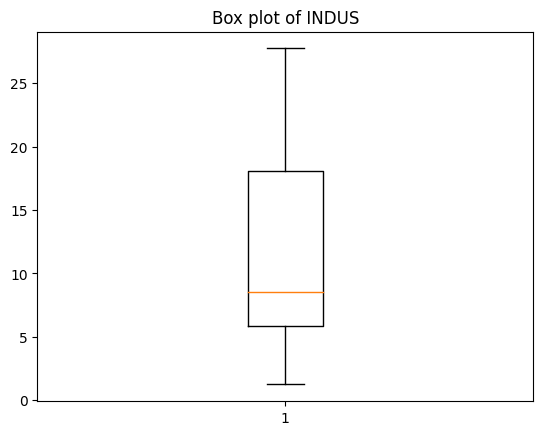

In [ ]:
plt.boxplot(data['INDUS'])
plt.title("Box plot of INDUS")